In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --------
# -- Q2 --
# --------

'''
    - Plot as points, the periods vs. distances for each planet on a log-log plot.
    - Write the name of the planet next to the point for that planet on the plot
'''

'\n    - Plot as points, the periods vs. distances for each planet on a log-log plot.\n    - Write the name of the planet next to the point for that planet on the plot\n'

In [3]:
# distances of the planets from the Sun 
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

#  corresponding periods of their orbits
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

# names of the planets
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

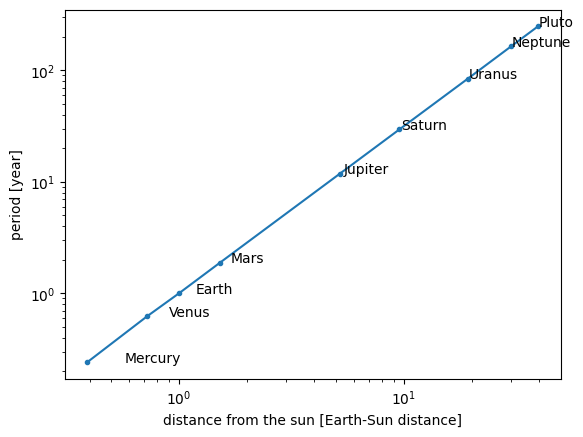

In [4]:
fig = plt.figure()
import math
ax = fig.add_subplot(111)
ax.plot(a,P,marker=".")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("distance from the sun [Earth-Sun distance]")
ax.set_ylabel("period [year]")
for it,name in enumerate(names):
    ax.text(a[it]+math.log(1.2), P[it], name)

In [5]:




# --------
# -- Q3 --
# --------

'''
- We want to draw a circle.
    . Create an array to hold the theta values—the more we use, the smoother the circle will be
    . Create x and y arrays from theta for your choice of 
    . Plot y vs. x
    . look up the matplotlib fill() function, and draw a circle filled in with a solid color.

- Generalize your circle drawing commands to produce a function,
    . draw_circle(x0, y0, R, color) that draws the circle. 
         (x0, y0) is the center of the circle, R is the radius, and color is the color of the circle.

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.
'''

theta = np.random.uniform(0,2*np.pi,1000)
x = np.cos(theta)
y = np.sin(theta)
x,y

(array([ 0.44769767,  0.14631849,  0.7589853 , -0.99668319,  0.32124589,
        -0.64176041,  0.55185027, -0.51414698,  0.22957887, -0.37080728,
        -0.60363193, -0.10593858,  0.74200821, -0.88353435,  0.57367319,
         0.46025724,  0.98819992,  0.97588529, -0.7038329 ,  0.31752106,
        -0.3999799 , -0.9720748 ,  0.82541835,  0.27463917,  0.98356569,
        -0.58892399,  0.8449442 , -0.52546725,  0.77684585,  0.60948876,
         0.65410794,  0.86867366,  0.96952517,  0.29840549,  0.65758735,
        -0.82559689, -0.3263386 ,  0.99993375, -0.98286595,  0.82181614,
        -0.99828142, -0.37058577,  0.46553498, -0.86074878,  0.99952173,
         0.27319441,  0.10916435, -0.98945574, -0.24449059,  0.89797889,
         0.25595263, -0.33201543,  0.85795086,  0.32454368,  0.99868496,
         0.15388436,  0.17540214,  0.8041889 ,  0.31800464,  0.48129322,
         0.8713728 ,  0.97150236,  0.46913552,  0.57729579, -0.05355138,
         0.97428427, -0.65932237, -0.60110328, -0.9

Text(0.5, 0, '$\\cos(x)$')

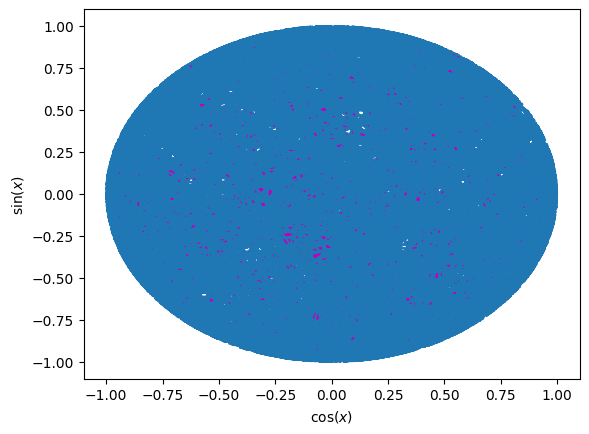

In [6]:
plt.plot(x, y)
plt.fill(x, y, color='m')
plt.ylabel(r"$\sin(x)$")
plt.xlabel(r"$\cos(x)$")

In [7]:
def draw_circle(x0,y0,R,color):
    theta = np.random.uniform(0,2*np.pi,100)
    x = np.cos(theta)*R + x0
    y = np.sin(theta)*R + y0
    plt.scatter(x, y, color=color)
    plt.fill(x, y, color=color, alpha=0.5)
    plt.ylabel(r"$\sin(x)$")
    plt.xlabel(r"$\cos(x)$")

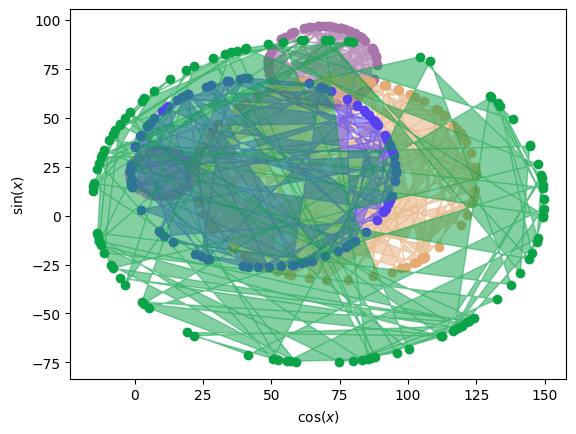

In [8]:
for i in range(5):
    x_0 = np.random.uniform(0,100,1)
    y_0 = np.random.uniform(0,100,1)
    radius = np.random.uniform(0,100,1)
    col = (np.random.random(), np.random.random(), np.random.random())
    draw_circle(x_0, y_0, radius, col)
    

In [9]:

# --------
# -- Q4 --
# --------
'''
Download the data file of global surface air temperature averages from here: 
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt 
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/
There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.
 - Read in this data using np.loadtxt().
 - Plot as a line the smoothed representation of the temperature changes.
 - Plot as points the temperature change (no smoothing). Color the points blue if they are < 0 and color them red if they are >= 0
You might find the numpy where() function useful.
    numpy.where(condition, [x, y, ]/)
        Return elements chosen from x or y depending on condition.

'''

import requests
url = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt'
r = requests.get(url, allow_redirects=True)
open('data.txt', 'wb').write(r.content)
data = np.loadtxt("data.txt")
print(data.shape)

(137, 3)


Text(0, 0.5, 'smoothed representation of the temperature change')

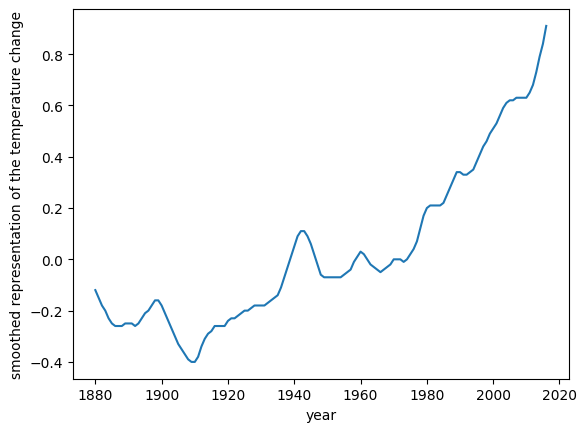

In [10]:
plt.plot(data[:,0], data[:,2])
plt.xlabel("year")
plt.ylabel("smoothed representation of the temperature change")

Text(0, 0.5, 'smoothed representation of the temperature change')

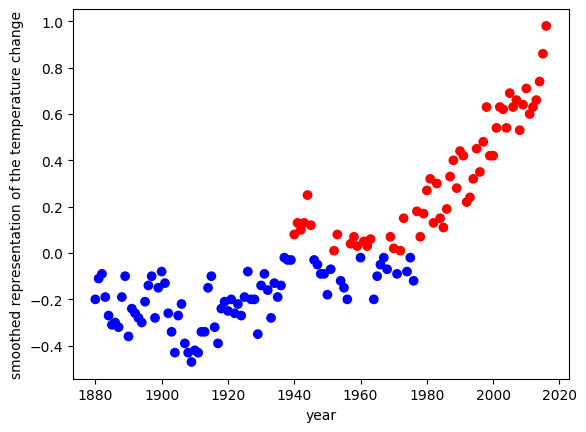

In [11]:
plt.scatter(data[:,0], data[:,1], color=np.where(data[:,1] >= 0, 'red', 'blue'))
plt.xlabel("year")
plt.ylabel("smoothed representation of the temperature change")

In [12]:


# --------
# -- Q5 --
# --------

'''
matplotlib has a number of ways to create multiple axes in a figure -- look at plt.subplots() 
(http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

    - Create an x array using NumPy with a number of points, spanning from [0,2pi]
    - Create 3 axes vertically, and do the following:
        . Define a new numpy array f initialized to a function of your choice.
        . Plot f in the top axes
        . Compute a numerical derivative of f, f', and plot this in the middle axes
        . Do this again, this time on f' to compute the second derivative and plot that in the bottom axes
'''

x = np.sort(np.random.uniform(0,2*np.pi,10))

def func(x):
    return x**2 + 5*x + 14
    
def funcPrime(x):
    h = 0.000001
    min = func(x-h)
    max = func(x+h)
    return (max-min) / (2*h)

def funcSecond(x):
    h = 0.000001
    min = funcPrime(x-h)
    max = funcPrime(x+h)
    return (max-min) / (2*h)

In [13]:
func(x)
funcPrime(x)

array([ 6.26074454,  7.07832369,  8.63295842, 10.39199917, 10.39411644,
       10.90895681, 11.99517523, 14.81275323, 16.45806661, 16.84810677])

Text(0.5, 0, 'x')

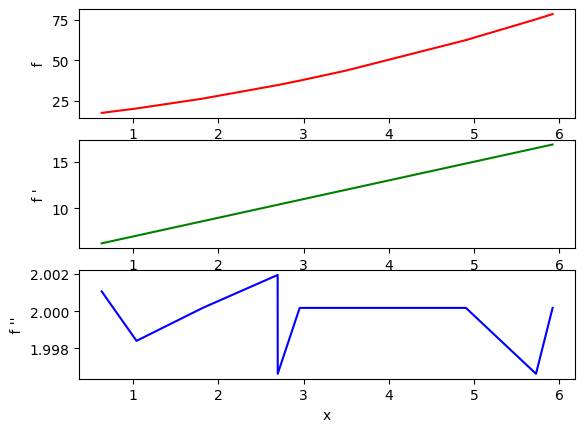

In [14]:
    
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(x, func(x), color='r')
ax1.set_ylabel(" f ")
ax2.plot(x, funcPrime(x), color='g')
ax2.set_ylabel(" f ' ")
ax3.plot(x, funcSecond(x), color='b')
ax3.set_ylabel(" f '' ")
ax3.set_xlabel("x")

In [17]:

# --------
# -- Q6 --
# --------

'''
In this exercise, we will read the file with the transcription of Star Trek TOS, 
Shore Leave and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

Read the file and create the dictionaty {'word':count}

    - Open the shore_leave.txt
    - Create the dictionary of the form {'word':count}, where count shows the amount of times the word was found in the text. 
      Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase
          f = open("shore_leave.txt", "r")
    - Plot a labelled bar chart of the most frequent 25 words with their frequencies.
'''

import re

f = open("shore_leave.txt", "r")

In [19]:
print(f)
counts = {}
for line in f:
    print(line)
    words = re.findall(r'\b\w+\b', line.lower()) 
    for word in words:  
        counts[word] = counts.get(word, 0) + 1

<_io.TextIOWrapper name='shore_leave.txt' mode='r' encoding='UTF-8'>
Bridge

Enterprise is orbiting a very green planet, and a young female Yeoman is getting a signature from the Captain.

Anything from the landing party.

They should be sending up a report momentarily, Captain. Kirk stretches and groans Something wrong.

A kink in my back. behind his back the Yeoman starts to massage it that is it. A little higher, please. Push. Push hard. Dig it in there, Mister

Spock steps forward and Kirk realises who is massaging his lower back

Thank you, Yeoman. that is sufficient.

You need sleep, Captain. If it is not out of line

I have enough of that from Doctor McCoy, Yeoman. Thank you.

Doctor McCoy is correct, Captain. After what this ship has been through in the last three months, there is not a crewman aboard who is not in need of rest. Myself excepted, of course.

Have Doctor McCoy report channeled to my quarters, Lieutenant.

Aye, aye, Captain.

Planet surface  

Beautiful, beautiful

In [22]:
print(counts)
word_count = {}
with open("shore_leave.txt", "r") as f:
    for line in f:
        words = re.findall(r'\b\w+\b', line.lower())
        for word in words:
            word_count[word] = word_count.get(word, 0) + 1

{'bridge': 12, 'enterprise': 2, 'is': 105, 'orbiting': 2, 'a': 133, 'very': 12, 'green': 5, 'planet': 19, 'and': 96, 'young': 6, 'female': 1, 'yeoman': 10, 'getting': 3, 'signature': 1, 'from': 18, 'the': 162, 'captain': 53, 'anything': 6, 'landing': 2, 'party': 4, 'they': 28, 'should': 6, 'be': 32, 'sending': 1, 'up': 21, 'report': 7, 'momentarily': 1, 'kirk': 33, 'stretches': 1, 'groans': 1, 'something': 6, 'wrong': 3, 'kink': 1, 'in': 40, 'my': 27, 'back': 17, 'behind': 4, 'his': 18, 'starts': 1, 'to': 102, 'massage': 1, 'it': 82, 'that': 47, 'little': 8, 'higher': 1, 'please': 1, 'push': 2, 'hard': 2, 'dig': 1, 'there': 27, 'mister': 33, 'spock': 23, 'steps': 1, 'forward': 1, 'realises': 1, 'who': 7, 'massaging': 1, 'lower': 1, 'thank': 5, 'you': 132, 'sufficient': 2, 'need': 4, 'sleep': 4, 'if': 7, 'not': 57, 'out': 18, 'of': 69, 'line': 3, 'i': 128, 'have': 50, 'enough': 1, 'doctor': 24, 'mccoy': 26, 'correct': 1, 'after': 10, 'what': 37, 'this': 46, 'ship': 8, 'has': 12, 'been':

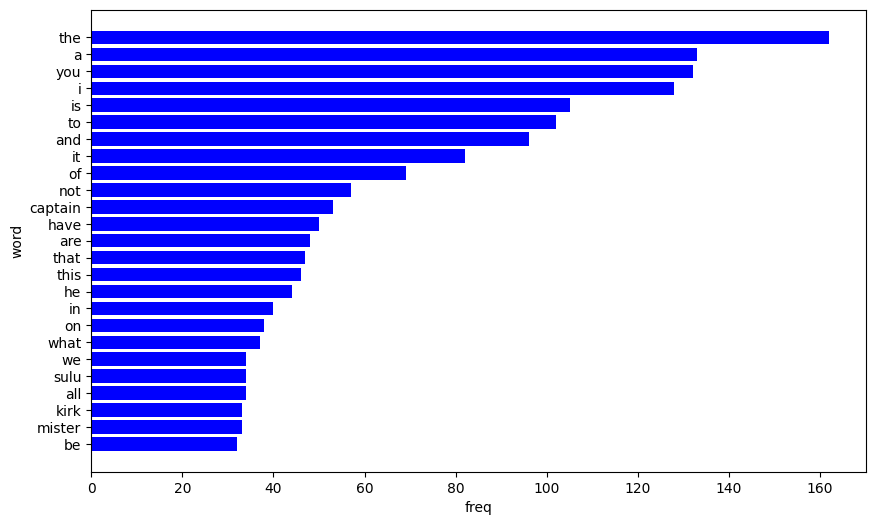

In [21]:
# sorting
sorted_words = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))

# most frequent 25 words
freq_words = list(sorted_words.keys())[:25]
word_fr = [sorted_words[word] for word in freq_words]

plt.figure(figsize=(10, 6))
plt.barh(freq_words, word_fr, color='blue')
plt.xlabel('freq')
plt.ylabel('word')
plt.gca().invert_yaxis() # aesthetics
plt.show()